In [14]:
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

In [2]:
#Normal reading
#data = pd.read_csv('../outputs/small_extended/backups/full_week/emissions.csv', delimiter=',', engine='python')

#With chunk reading
chunksize = 10**6
tfr=pd.read_csv('../outputs/small_extended/emissions.csv', delimiter=',', engine='python', chunksize=chunksize, iterator=True)
data_simul = pd.concat(tfr, ignore_index=True)

In [34]:
#############
#Map small
#Torget - poly_79
#############
#Map small_extended
##
#with 200 x 200 cells
#Torget - poly_125
#Bakke kirke - poly_174
#Elgeseter - poly_120 (+-)
##
#with 100 x 100 cells
#Torget - poly_490
#Bakke kirke - poly_685
#Elgeseter - poly_504 (+-)
#############
#Map main
#Torget - poly_458
#Bakke kirke - poly_603
#Elgeseter - poly_488
#E6 Tiller - 

torvet_poly = 'poly_490'
bakke_kirke_poly = 'poly_685'
elgeseter_poly = 'poly_504'

from_date = '2020-01-13'
to_date = '2020-01-20'

simul_torget = data_simul[data_simul.Cell == torvet_poly]

simul_bakke_kirke = data_simul[data_simul.Cell == bakke_kirke_poly]

simul_elgeseter = data_simul[data_simul.Cell == elgeseter_poly]

#Resample with time_resolution average
time_resolution = 3600
simul_torget = simul_torget.groupby(by=(simul_torget['Timestep']/time_resolution).astype(int)).mean()
simul_bakke_kirke = simul_bakke_kirke.groupby(by=(simul_bakke_kirke['Timestep']/time_resolution).astype(int)).mean()
simul_elgeseter = simul_elgeseter.groupby(by=(simul_elgeseter['Timestep']/time_resolution).astype(int)).mean()

############
##Fetch real measurements
inputFile = open('nilu_data/torvet_'+ from_date + '_' + to_date +'_no2.json')
data = json.load(inputFile) 
real_torvet = np.zeros(len(data[0]['values']))

for i in range(len(data[0]['values'])):
    real_torvet[i] = data[0]['values'][i]['value']
    
    
inputFile = open('nilu_data/bakke_kirke_'+ from_date + '_' + to_date +'_nox.json')
data = json.load(inputFile) 
real_bakke = np.zeros(len(data[0]['values']))

for i in range(len(data[0]['values'])):
    real_bakke[i] = data[0]['values'][i]['value']    


inputFile = open('nilu_data/elgeseter_'+ from_date + '_' + to_date +'_nox.json')
data = json.load(inputFile) 
real_elgeseter = np.zeros(len(data[0]['values']))

for i in range(len(data[0]['values'])):
    real_elgeseter[i] = data[0]['values'][i]['value']
    
    


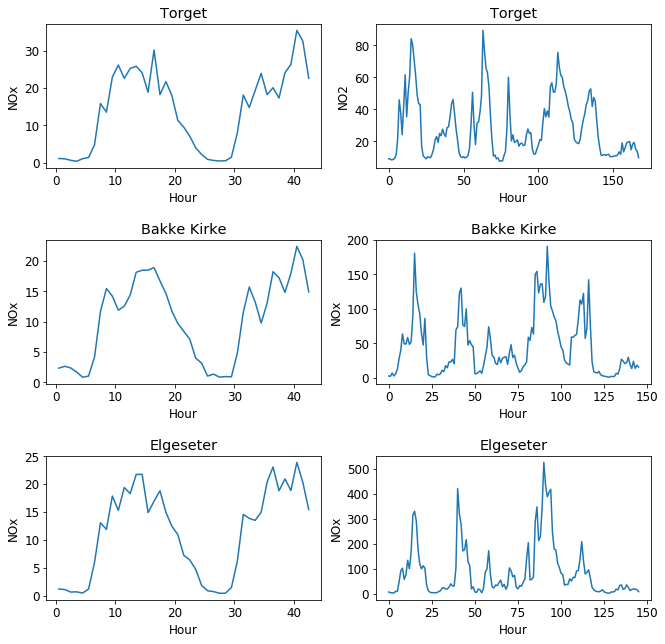

In [41]:
####Save single plot for simulated and real########
fig, axs = plt.subplots(3,2)

plt.rcParams.update({'font.size': 12})

axs[0,0].plot(simul_torget.Timestep/3600,simul_torget.NOx)
axs[0,0].set(xlabel='Hour', ylabel='NOx')
axs[0,0].set_title('Torget')
#axs[0,0].set_xlim(0,24)

axs[1,0].plot(simul_bakke_kirke.Timestep/3600,simul_bakke_kirke.NOx)
axs[1,0].set(xlabel='Hour', ylabel='NOx')
axs[1,0].set_title('Bakke Kirke')
#axs[1,0].set_xlim(0,24)

axs[2,0].plot(simul_elgeseter.Timestep/3600,simul_elgeseter.NOx)
axs[2,0].set(xlabel='Hour', ylabel='NOx')
axs[2,0].set_title('Elgeseter')
#axs[2,0].set_xlim(0,24)

plt.subplots_adjust(left=None, bottom=-0.5, right=None, top=1.5, wspace=None, hspace=0.5)

#plt.savefig('figs/simul_pollution.pdf',format='pdf',bbox_inches='tight')

#############################################
#Draw plots of real measurements

axs[0,1].plot(real_torvet)
#ax1.xticks(np.arange(len(no2)))
axs[0,1].set(xlabel='Hour', ylabel='NO2')
axs[0,1].set_title('Torget')
#axs[0,1].set_xlim(0,24)

######
 
axs[1,1].plot(real_bakke)
axs[1,1].set(xlabel='Hour', ylabel='NOx')
axs[1,1].set_title('Bakke Kirke')
#axs[1,1].set_xlim(0,24)

#####
   
axs[2,1].plot(real_elgeseter)
#ax3.xticks(np.arange(len(nox)))
axs[2,1].set(xlabel='Hour', ylabel='NOx')
axs[2,1].set_title('Elgeseter')
#axs[2,1].set_xlim(0,24)

plt.subplots_adjust(left=-0.5, bottom=-0.5, right=None, top=1.5, wspace=None, hspace=0.5)

if not os.path.exists('figs/from_'+ from_date + '_to_' + to_date):
        os.mkdir('figs/from_'+ from_date + '_to_' + to_date)

#fig.savefig('figs/real_pollution.pdf',format='pdf',bbox_inches='tight')
fig.savefig('figs/from_'+ from_date + '_to_' + to_date +'/compare_pollution.pdf',format='pdf',bbox_inches='tight')

#Subplots_adjust defaults
# left = 0.125  # the left side of the subplots of the figure
# right = 0.9   # the right side of the subplots of the figure
# bottom = 0.1  # the bottom of the subplots of the figure
# top = 0.9     # the top of the subplots of the figure
# wspace = 0.2  # the amount of width reserved for space between subplots,
#               # expressed as a fraction of the average axis width
# hspace = 0.2  # the amount of height reserved for space between subplots,
#               # expressed as a fraction of the average axis height

In [ ]:
## Save separate files for simulated and real########

#Draw plots of simulation
fig, axs = plt.subplots(3,1)

plt.rcParams.update({'font.size': 12})

axs[0].plot(simul_torget.Timestep/3600,simul_torget.NOx)
axs[0].set(xlabel='Hour', ylabel='NOx')
axs[0].set_title('Torget')
axs[0].set_xlim(0,24)

axs[1].plot(simul_bakke_kirke.Timestep/3600,simul_bakke_kirke.NOx)
axs[1].set(xlabel='Hour', ylabel='NOx')
axs[1].set_title('Bakke Kirke')
axs[1].set_xlim(0,24)

axs[2].plot(simul_elgeseter.Timestep/3600,simul_elgeseter.NOx)
axs[2].set(xlabel='Hour', ylabel='NOx')
axs[2].set_title('Elgeseter')
axs[2].set_xlim(0,24)

plt.subplots_adjust(left=None, bottom=-0.5, right=None, top=1.5, wspace=None, hspace=0.5)

plt.savefig('figs/simul_pollution.pdf',format='pdf',bbox_inches='tight')

#############################################
#Draw plots of real measurements

fig, axs = plt.subplots(3,1)

axs[0].plot(real_torvet)
#ax1.xticks(np.arange(len(no2)))
axs[0].set(xlabel='Hour', ylabel='NO2')
axs[0].set_title('Torget')
axs[0].set_xlim(0,24)

######
 
axs[1].plot(real_bakke)
axs[1].set(xlabel='Hour', ylabel='NOx')
axs[1].set_title('Bakke Kirke')
axs[1].set_xlim(0,24)

#####
   
axs[2].plot(real_elgeseter)
#ax3.xticks(np.arange(len(nox)))
axs[2].set(xlabel='Hour', ylabel='NOx')
axs[2].set_title('Elgeseter')
axs[2].set_xlim(0,24)

plt.subplots_adjust(left=None, bottom=-0.5, right=None, top=1.5, wspace=None, hspace=0.5)

fig.savefig('figs/real_pollution.pdf',format='pdf',bbox_inches='tight')
#fig.savefig('figs/compare_pollution.pdf',format='pdf',bbox_inches='tight')

#Subplots_adjust defaults
# left = 0.125  # the left side of the subplots of the figure
# right = 0.9   # the right side of the subplots of the figure
# bottom = 0.1  # the bottom of the subplots of the figure
# top = 0.9     # the top of the subplots of the figure
# wspace = 0.2  # the amount of width reserved for space between subplots,
#               # expressed as a fraction of the average axis width
# hspace = 0.2  # the amount of height reserved for space between subplots,
#               # expressed as a fraction of the average axis height

In [32]:
#simul_torget.groupby(by=(simul_torget['Timestep']/time_resolution).astype(int))
tg=simul_torget.groupby(by=(simul_torget['Timestep']/time_resolution).astype(int)).mean()

In [40]:
simul_bakke_kirke.NOx

Timestep
0      2.304082
1      2.612849
2      2.333643
3      1.659510
4      0.800454
5      0.993307
6      4.125407
7     11.669420
8     15.460024
9     14.186439
10    11.871075
11    12.537817
12    14.391284
13    18.140105
14    18.473221
15    18.491677
16    18.907312
17    16.719999
18    14.644411
19    11.711532
20     9.682150
21     8.385682
22     7.097455
23     3.961165
24     3.130690
25     0.994186
26     1.318312
27     0.819653
28     0.913895
29     0.871485
30     4.792043
31    11.544698
32    15.699430
33    13.226460
34     9.755703
35    13.031692
36    18.245965
37    17.246117
38    14.822362
39    17.943627
40    22.423843
41    20.234165
42    14.904397
Name: NOx, dtype: float64